In [ ]:
champion_name_eng = ['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Belveth', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Gwen', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'KSante', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nilah', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Rell', 'Renata', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Samira', 'Sejuani', 'Senna', 'Seraphine', 'Sett', 'Shaco', 'Shen', 'Shyvana', 'Singed', 'Sion', 'Sivir', 'Skarner', 'Sona', 'Soraka', 'Swain', 'Sylas', 'Syndra', 'TahmKench', 'Taliyah', 'Talon', 'Taric', 'Teemo', 'Thresh', 'Tristana', 'Trundle', 'Tryndamere', 'TwistedFate', 'Twitch', 'Udyr', 'Urgot', 'Varus', 'Vayne', 'Veigar', 'Velkoz', 'Vex', 'Vi', 'Viego', 'Viktor', 'Vladimir', 'Volibear', 'Warwick', 'Xayah', 'Xerath', 'XinZhao', 'Yasuo', 'Yone', 'Yorick', 'Yuumi', 'Zac', 'Zed', 'Zeri', 'Ziggs', 'Zilean', 'Zoe', 'Zyra']

In [ ]:
import os
X = []

for dirname, _, filenames in os.walk('/content/drive/MyDrive/4주프로젝트/champion_img1/'): # 경로, 폴더, 파일명들(아트록스, 아리, 아칼리...162개)
  for filename in filenames:
    X.append(os.path.join(dirname,filename))

X = sorted(X)
X[:3]

['/content/drive/MyDrive/4주프로젝트/champion_img1/Aatrox/Aatrox.jpg',
 '/content/drive/MyDrive/4주프로젝트/champion_img1/Ahri/Ahri.jpg',
 '/content/drive/MyDrive/4주프로젝트/champion_img1/Akali/Akali.jpg']

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)

df_meta = pd.DataFrame({
    "path": X,
    "label": champion_name_eng
})

df_meta

,path,label
0,/content/drive/MyDrive/4주프로젝트/champion_img1/Aatrox/Aatrox.jpg,Aatrox
1,/content/drive/MyDrive/4주프로젝트/champion_img1/Ahri/Ahri.jpg,Ahri
2,/content/drive/MyDrive/4주프로젝트/champion_img1/Akali/Akali.jpg,Akali
3,/content/drive/MyDrive/4주프로젝트/champion_img1/Akshan/Akshan.jpg,Akshan
4,/content/drive/MyDrive/4주프로젝트/champion_img1/Alistar/Alistar.jpg,Alistar
...,...,...
157,/content/drive/MyDrive/4주프로젝트/champion_img1/Zeri/Zeri.jpg,Zeri
158,/content/drive/MyDrive/4주프로젝트/champion_img1/Ziggs/Ziggs.jpg,Ziggs
159,/content/drive/MyDrive/4주프로젝트/champion_img1/Zilean/Zilean.jpg,Zilean
160,/content/drive/MyDrive/4주프로젝트/champion_img1/Zoe/Zoe.jpg,Zoe


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    zoom_range=[0.7, 0.8],
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale = 1 / 255.0,
)

In [ ]:
# 흘려주기
train_flow_gen = train_gen.flow_from_dataframe(
    dataframe=df_meta, # 이미지의 경로와 레이블이 들어있는 데이터프레임
    x_col = 'path', 
    y_col='label',
    target_size=(120,120),
    class_mode='sparse',
    shuffle=True

)

Found 162 validated image filenames belonging to 162 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(120, 120, 3)),

    #Feature Extraction
    Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'),
    Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu'),
    Conv2D(filters=32, kernel_size=3, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    #Fully Connected 32차원이므로(512이하)
    Flatten(),

    Dense(512, activation='relu', kernel_regularizer="l2"),
    Dense(256, activation='relu', kernel_regularizer="l2"),
    Dense(162, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 118, 118, 64)      1792      
                                                                 
 conv2d_25 (Conv2D)          (None, 116, 116, 64)      36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 58, 58, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 56, 56, 32)        18464     
                                                                 
 conv2d_27 (Conv2D)          (None, 54, 54, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 27, 27, 32)       0         
 g2D)                                                 


# 오히려 전이학습을하니 엄청난 과대적합이 이루어졌다. 그냥 단순히 Conv1D층을 몇개만 쌓는것이 결과가 훨씬 좋다.

In [ ]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D, Input, Dense, Flatten

# from tensorflow.keras.applications import ResNet50V2

# input = Input(shape=(120,120,3))

# # 이미 훈련이 완료된 모델 가져오기
# base_model = ResNet50V2(input_tensor=input, include_top=False) 
# # include_top 내가 뒤에 층을 더추가할꺼면 마지막 FCL사용하지 않을거라고 해줘야함

# bm_output = base_model.output
# (4,4,2048)


# # 커스터마이징(downstream task수행)
# c = GlobalAveragePooling2D()(bm_output)
# c = Dense(512, activation='relu', kernel_regularizer="l2")(c) # l2규제 릿지(가중치가 0이되지않음)
# c = Dense(256, activation='relu', kernel_regularizer="l2")(c)

# # 출력층이전에는 뉴런이 많이 없는 것이 좋음.
# output = Dense(162, activation='softmax')(c)

# model = Model(inputs=input, outputs= output)
# model.summary()

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy

model.compile(
    optimizer=Adam(),
    loss = sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping
# callbacks = [EarlyStopping(monitor='loss', patience=5, mode='min')]

hist = model.fit(train_flow_gen,
          batch_size = 32,
          epochs = 80)

Epoch 1/80
6/6 [==============================] - 3s 127ms/step - loss: 15.3100 - accuracy: 0.0000e+00
Epoch 2/80
6/6 [==============================] - 1s 154ms/step - loss: 9.8604 - accuracy: 0.0062
Epoch 3/80
6/6 [==============================] - 1s 153ms/step - loss: 7.8773 - accuracy: 0.0062
Epoch 4/80
6/6 [==============================] - 1s 152ms/step - loss: 7.2467 - accuracy: 0.0062
Epoch 5/80
6/6 [==============================] - 1s 159ms/step - loss: 6.8302 - accuracy: 0.0062
Epoch 6/80
6/6 [==============================] - 1s 148ms/step - loss: 6.3990 - accuracy: 0.0062
Epoch 7/80
6/6 [==============================] - 1s 146ms/step - loss: 6.0561 - accuracy: 0.0123
Epoch 8/80
6/6 [==============================] - 1s 255ms/step - loss: 5.8253 - accuracy: 0.0062
Epoch 9/80
6/6 [==============================] - 1s 151ms/step - loss: 5.6767 - accuracy: 0.0062
Epoch 10/80
6/6 [==============================] - 1s 157ms/step - loss: 5.5308 - accuracy: 0.0123
Epoch 11/80
6/

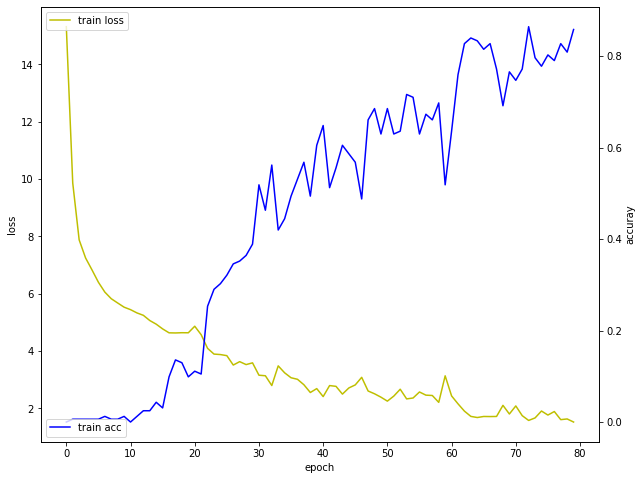

In [ ]:
# 모델학습과정 시각화

# 첫 번째 줄에서 %matplotlib inline 의 역할은 notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것(새창안열고 바로밑에표시 주피터노트북같은곳에서)
# 이는 IPython 에서 제공하는 Rich output 에 대한 표현 방식
# 도표와 같은 그림, 소리, 애니메이션 과 같은 결과물들을 Rich output 이라함.

%matplotlib inline
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10,8))

share_x_ax = ax.twinx() # twinx x축만공유하고 y축은따로써라! scale맞추기 좋을듯

ax.plot(hist.history['loss'], 'y', label='train loss')
# ax.plot(hist.history['val_loss'], 'r', label='val loss')

share_x_ax.plot(hist.history['accuracy'], 'b', label='train acc')
# share_x_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

ax.set_xlabel('epoch')
ax.set_ylabel('loss')
share_x_ax.set_ylabel('accuray')

ax.legend(loc='upper left') # 범례위치지정
share_x_ax.legend(loc='lower left')

plt.show()

# 테스트 훈련셋잘맞추는지

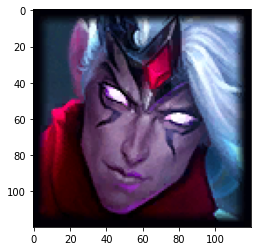

In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/4주프로젝트/champion_img1/Varus/Varus.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image / 255.0

image_resized = cv2.resize(image, (120, 120))

import matplotlib.pyplot as plt
plt.imshow(image_resized)

In [ ]:
import tensorflow as tf
image_resized2 = image_resized[tf.newaxis,...]

result = model.predict(image_resized2)
result.argmax()

1/1 [==============================] - 0s 81ms/step


137

# 테스트(최종)

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/케이틀린1픽')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 버그 상하/ 좌우반대로나옴 왜지
image_resized = cv2.resize(image, (1170, 660))

# 혹시몰라서복사본으로 수행
image_copy = image_resized.copy()

# 1팀 5캐릭터가져오기

x=98
y=138
team1 = []
for i in range(5):
  team1.append(image_copy[x:y, 55:95])
  x+=75
  y+=75
  # plt.imshow(globals()[f"team1_{i+1}"])
  # plt.show()

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/케이틀린1픽')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 버그 상하/ 좌우반대로나옴 왜지
image_resized = cv2.resize(image, (1170, 660))

# 혹시몰라서복사
image_copy = image_resized.copy()

# 2팀 5캐릭터가져오기

x=100
y=140
team2 = []
for i in range(5):
  team2.append(image_copy[x:y, 1103:1143])
  x+=75
  y+=75
  # plt.imshow(globals()[f"team2_{i+1}"])
  # plt.show()

import tensorflow as tf

# 1팀챔피언사진
team1_1 = team1[0]
team1_2 = team1[1]
team1_3 = team1[2]
team1_4 = team1[3]
team1_5 = team1[4]
team2_1 = team2[0]
team2_2 = team2[1]
team2_3 = team2[2]
team2_4 = team2[3]
team2_5 = team2[4]


team1_1 = team1_1 / 255.0
image_resized = cv2.resize(team1_1, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result1_1 = model.predict(image_resized)
result1_1 = result1_1.argmax()

team1_2 = team1_2 / 255.0
image_resized = cv2.resize(team1_2, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result1_2 = model.predict(image_resized)
result1_2 = result1_2.argmax()

team1_3 = team1_3 / 255.0
image_resized = cv2.resize(team1_3, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result1_3 = model.predict(image_resized)
result1_3 = result1_3.argmax()

team1_4 = team1_4 / 255.0
image_resized = cv2.resize(team1_4, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result1_4 = model.predict(image_resized)
result1_4 = result1_4.argmax()

team1_5 = team1_5 / 255.0
image_resized = cv2.resize(team1_5, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result1_5 = model.predict(image_resized)
result1_5 = result1_5.argmax()

# 2팀챔피언사진
team2_1 = team2_1 / 255.0
image_resized = cv2.resize(team2_1, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result2_1 = model.predict(image_resized)
result2_1 = result2_1.argmax()

team2_2 = team2_2 / 255.0
image_resized = cv2.resize(team2_2, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result2_2 = model.predict(image_resized)
result2_2 = result2_2.argmax()

team2_3 = team2_3 / 255.0
image_resized = cv2.resize(team2_3, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result2_3 = model.predict(image_resized)
result2_3 = result2_3.argmax()

team2_4 = team2_4 / 255.0
image_resized = cv2.resize(team2_4, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result2_4 = model.predict(image_resized)
result2_4 = result2_4.argmax()

team2_5 = team2_5 / 255.0
image_resized = cv2.resize(team2_5, (120, 120))

image_resized = image_resized[tf.newaxis,...,]

result2_5 = model.predict(image_resized)
result2_5 = result2_5.argmax()

cham_idx = []
cham_idx.append(result1_1)
cham_idx.append(result1_2)
cham_idx.append(result1_3)
cham_idx.append(result1_4)
cham_idx.append(result1_5)
cham_idx.append(result2_1)
cham_idx.append(result2_2)
cham_idx.append(result2_3)
cham_idx.append(result2_4)
cham_idx.append(result2_5)

# 영어랑 한글 정렬순서가 다르기때문에 전처리
# 먼저 숫자 영어로 바꾸고
cham_idx_dict = {'Aatrox': 0, 'Ahri': 1, 'Akali': 2, 'Akshan': 3, 'Alistar': 4, 'Amumu': 5, 'Anivia': 6, 'Annie': 7, 'Aphelios': 8, 'Ashe': 9, 'AurelionSol': 10, 'Azir': 11, 'Bard': 12, 'Belveth': 13, 'Blitzcrank': 14, 'Brand': 15, 'Braum': 16, 'Caitlyn': 17, 'Camille': 18, 'Cassiopeia': 19, 'Chogath': 20, 'Corki': 21, 'Darius': 22, 'Diana': 23, 'DrMundo': 24, 'Draven': 25, 'Ekko': 26, 'Elise': 27, 'Evelynn': 28, 'Ezreal': 29, 'Fiddlesticks': 30, 'Fiora': 31, 'Fizz': 32, 'Galio': 33, 'Gangplank': 34, 'Garen': 35, 'Gnar': 36, 'Gragas': 37, 'Graves': 38, 'Gwen': 39, 'Hecarim': 40, 'Heimerdinger': 41, 'Illaoi': 42, 'Irelia': 43, 'Ivern': 44, 'Janna': 45, 'JarvanIV': 46, 'Jax': 47, 'Jayce': 48, 'Jhin': 49, 'Jinx': 50, 'KSante': 51, 'Kaisa': 52, 'Kalista': 53, 'Karma': 54, 'Karthus': 55, 'Kassadin': 56, 'Katarina': 57, 'Kayle': 58, 'Kayn': 59, 'Kennen': 60, 'Khazix': 61, 'Kindred': 62, 'Kled': 63, 'KogMaw': 64, 'Leblanc': 65, 'LeeSin': 66, 'Leona': 67, 'Lillia': 68, 'Lissandra': 69, 'Lucian': 70, 'Lulu': 71, 'Lux': 72, 'Malphite': 73, 'Malzahar': 74, 'Maokai': 75, 'MasterYi': 76, 'MissFortune': 77, 'MonkeyKing': 78, 'Mordekaiser': 79, 'Morgana': 80, 'Nami': 81, 'Nasus': 82, 'Nautilus': 83, 'Neeko': 84, 'Nidalee': 85, 'Nilah': 86, 'Nocturne': 87, 'Nunu': 88, 'Olaf': 89, 'Orianna': 90, 'Ornn': 91, 'Pantheon': 92, 'Poppy': 93, 'Pyke': 94, 'Qiyana': 95, 'Quinn': 96, 'Rakan': 97, 'Rammus': 98, 'RekSai': 99, 'Rell': 100, 'Renata': 101, 'Renekton': 102, 'Rengar': 103, 'Riven': 104, 'Rumble': 105, 'Ryze': 106, 'Samira': 107, 'Sejuani': 108, 'Senna': 109, 'Seraphine': 110, 'Sett': 111, 'Shaco': 112, 'Shen': 113, 'Shyvana': 114, 'Singed': 115, 'Sion': 116, 'Sivir': 117, 'Skarner': 118, 'Sona': 119, 'Soraka': 120, 'Swain': 121, 'Sylas': 122, 'Syndra': 123, 'TahmKench': 124, 'Taliyah': 125, 'Talon': 126, 'Taric': 127, 'Teemo': 128, 'Thresh': 129, 'Tristana': 130, 'Trundle': 131, 'Tryndamere': 132, 'TwistedFate': 133, 'Twitch': 134, 'Udyr': 135, 'Urgot': 136, 'Varus': 137, 'Vayne': 138, 'Veigar': 139, 'Velkoz': 140, 'Vex': 141, 'Vi': 142, 'Viego': 143, 'Viktor': 144, 'Vladimir': 145, 'Volibear': 146, 'Warwick': 147, 'Xayah': 148, 'Xerath': 149, 'XinZhao': 150, 'Yasuo': 151, 'Yone': 152, 'Yorick': 153, 'Yuumi': 154, 'Zac': 155, 'Zed': 156, 'Zeri': 157, 'Ziggs': 158, 'Zilean': 159, 'Zoe': 160, 'Zyra': 161}

test = []
for idx in cham_idx:
  for key, value in cham_idx_dict.items():
    if value == idx:
      test.append(key)

champion_name_eng = ['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar', 'Amumu', 'Anivia', 'Annie', 'Aphelios', 'Ashe', 'AurelionSol', 'Azir', 'Bard', 'Belveth', 'Blitzcrank', 'Brand', 'Braum', 'Caitlyn', 'Camille', 'Cassiopeia', 'Chogath', 'Corki', 'Darius', 'Diana', 'Draven', 'DrMundo', 'Ekko', 'Elise', 'Evelynn', 'Ezreal', 'Fiddlesticks', 'Fiora', 'Fizz', 'Galio', 'Gangplank', 'Garen', 'Gnar', 'Gragas', 'Graves', 'Gwen', 'Hecarim', 'Heimerdinger', 'Illaoi', 'Irelia', 'Ivern', 'Janna', 'JarvanIV', 'Jax', 'Jayce', 'Jhin', 'Jinx', 'Kaisa', 'Kalista', 'Karma', 'Karthus', 'Kassadin', 'Katarina', 'Kayle', 'Kayn', 'Kennen', 'Khazix', 'Kindred', 'Kled', 'KogMaw', 'KSante', 'Leblanc', 'LeeSin', 'Leona', 'Lillia', 'Lissandra', 'Lucian', 'Lulu', 'Lux', 'Malphite', 'Malzahar', 'Maokai', 'MasterYi', 'MissFortune', 'MonkeyKing', 'Mordekaiser', 'Morgana', 'Nami', 'Nasus', 'Nautilus', 'Neeko', 'Nidalee', 'Nilah', 'Nocturne', 'Nunu', 'Olaf', 'Orianna', 'Ornn', 'Pantheon', 'Poppy', 'Pyke', 'Qiyana', 'Quinn', 'Rakan', 'Rammus', 'RekSai', 'Rell', 'Renata', 'Renekton', 'Rengar', 'Riven', 'Rumble', 'Ryze', 'Samira', 'Sejuani', 'Senna', 'Seraphine', 'Sett', 'Shaco', 'Shen', 'Shyvana', 'Singed', 'Sion', 'Sivir', 'Skarner', 'Sona', 'Soraka', 'Swain', 'Sylas', 'Syndra', 'TahmKench', 'Taliyah', 'Talon', 'Taric', 'Teemo', 'Thresh', 'Tristana', 'Trundle', 'Tryndamere', 'TwistedFate', 'Twitch', 'Udyr', 'Urgot', 'Varus', 'Vayne', 'Veigar', 'Velkoz', 'Vex', 'Vi', 'Viego', 'Viktor', 'Vladimir', 'Volibear', 'Warwick', 'Xayah', 'Xerath', 'XinZhao', 'Yasuo', 'Yone', 'Yorick', 'Yuumi', 'Zac', 'Zed', 'Zeri', 'Ziggs', 'Zilean', 'Zoe', 'Zyra']
champion_name_kr = champion = ['아트록스', '아리', '아칼리', '아크샨', '알리스타', '아무무', '애니비아', '애니', '아펠리오스', '애쉬', '아우렐리온솔', '아지르', '바드', '벨베스', '블리츠크랭크', '브랜드', '브라움', '케이틀린', '카밀', '카시오페아', '초가스', '코르키', '다리우스', '다이애나', '드레이븐', '문도박사', '에코', '엘리스', '이블린', '이즈리얼', '피들스틱', '피오라', '피즈', '갈리오', '갱플랭크', '가렌', '나르', '그라가스', '그레이브즈', '그웬', '헤카림', '하이머딩거', '일라오이', '이렐리아', '아이번', '잔나', '자르반4세', '잭스', '제이스', '진', '징크스', '카이사', '칼리스타', '카르마', '카서스', '카사딘','카타리나', '케일', '케인', '케넨', '카직스', '킨드레드', '클레드', '코그모', '크산테', '르블랑', '리신', '레오나', '릴리아', '리산드라', '루시안', '룰루', '럭스', '말파이트', '말자하', '마오카이', '마스터이', '미스포츈', '오공', '모데카이저', '모르가나', '나미', '나서스', '노틸러스', '니코', '니달리', '닐라', '녹턴', '누누와윌럼프', '올라프', '오리아나', '오른', '판테온','뽀삐', '파이크', '키아나', '퀸', '라칸', '람머스', '렉사이', '렐', '레나타글라스크', '레넥톤', '렝가', '리븐', '럼블', '라이즈', '사미라', '세주아니', '세나', '세라핀', '세트', '샤코', '쉔', '쉬바나', '신지드', '사이온', '시비르', '스카너', '소나', '소라카', '스웨인', '사일러스', '신드라', '탐켄치', '탈리야', '탈론', '타릭', '티모', '쓰레쉬', '트리스타나', '트런들' , '트린다미어', '트위스티드페이트', '트위치', '우디르', '우르곳', '바루스', '베인', '베이가', '벨코즈', '벡스', '바이', '비에고', '빅토르', '블라디미르', '볼리베어', '워윅', '자야', '제라스', '신짜오', '야스오', '요네', '요릭', '유미', '잭스', '제드', '제리', '직스', '질리언', '조이', '자이라']
test_kr = []

for i in range(10):
  for j in range(162):
    if test[i] == champion_name_eng[j]:
      test_kr.append(champion_name_kr[j])

test_kr
# 1개빼고다맞춤!!꺅

1/1 [==============================] - 0s 27ms/step


['케이틀린', '트위치', '제라스', '샤코', '잭스', '애쉬', '요릭', '미스포츈', '리신', '아칼리']

In [ ]:
train_flow_gen.class_indices

{'Aatrox': 0,
 'Ahri': 1,
 'Akali': 2,
 'Akshan': 3,
 'Alistar': 4,
 'Amumu': 5,
 'Anivia': 6,
 'Annie': 7,
 'Aphelios': 8,
 'Ashe': 9,
 'AurelionSol': 10,
 'Azir': 11,
 'Bard': 12,
 'Belveth': 13,
 'Blitzcrank': 14,
 'Brand': 15,
 'Braum': 16,
 'Caitlyn': 17,
 'Camille': 18,
 'Cassiopeia': 19,
 'Chogath': 20,
 'Corki': 21,
 'Darius': 22,
 'Diana': 23,
 'DrMundo': 24,
 'Draven': 25,
 'Ekko': 26,
 'Elise': 27,
 'Evelynn': 28,
 'Ezreal': 29,
 'Fiddlesticks': 30,
 'Fiora': 31,
 'Fizz': 32,
 'Galio': 33,
 'Gangplank': 34,
 'Garen': 35,
 'Gnar': 36,
 'Gragas': 37,
 'Graves': 38,
 'Gwen': 39,
 'Hecarim': 40,
 'Heimerdinger': 41,
 'Illaoi': 42,
 'Irelia': 43,
 'Ivern': 44,
 'Janna': 45,
 'JarvanIV': 46,
 'Jax': 47,
 'Jayce': 48,
 'Jhin': 49,
 'Jinx': 50,
 'KSante': 51,
 'Kaisa': 52,
 'Kalista': 53,
 'Karma': 54,
 'Karthus': 55,
 'Kassadin': 56,
 'Katarina': 57,
 'Kayle': 58,
 'Kayn': 59,
 'Kennen': 60,
 'Khazix': 61,
 'Kindred': 62,
 'Kled': 63,
 'KogMaw': 64,
 'Leblanc': 65,
 'LeeSin': 66,
 

# 모델저장

In [ ]:
# import os

# os.mkdir('/content/drive/MyDrive/4주프로젝트/model_save')

In [ ]:
model.save('/content/drive/MyDrive/4주프로젝트/model_save/lol_champion_img_model2')